## 1. Общая информация
Мобильная игра зарабатывает на показе рекламы. Есть несколько форматов:  
int – полноэкранная реклама;  
banner – горизонтальный баннер, висит внизу экрана пока юзер играет;  
rv – видео, которое юзер смотрит по желанию и за просмотр получает монетки или др. ресурсы. Информация о каждом показе
отправляется в аналитику и содержит доход от показа, формат показанной рекламы, рекламную сеть от которой был показ и др. eCPM – доход за 1000 показов рекламы.
## 2. Бизнес задача
Провести исследование показов рекламы с целью понять на сколько отличается eCPM в зависимости от географии (города) юзера, версии ОС и других параметров. Интересны любые инсайты и находки по eCPM-ам. Этот csv файл содержит информацию о показах рекламы для юзеров США:  
[Данные](https://drive.google.com/drive/folders/1bjWlzyXV8ALcoxZYrdNQH6_MOm3nS3Pl?usp=sharing)
## 3. Что требуется
1. Для каждого формата рекламы:
    a. построить распределение средних eCPM-ов юзеров
    b. отобразить средние eCPM-ы по городам, версиям ОС
    c. отобразить суммарные доходы по городам, версиям ОС
2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.
3. Описать наблюдения и вывод по исследованию.

## 4. Дополнительные (по желанию)
Исследовать:
– Какой процент доходов содержит информацию о городе юзера
– Зависит ли eCPM от времени дня
## 5. Вспомогательная информация
Столбец profile_id – id юзера  
Столбец event_json содержит данные о событии показа рекламы:  
    ad_type – формат рекламы (int, banner или rv)  
    placement – когда/где был показ рекламы в игре  
    view_index – номер показа конкретного формата рекламы для юзера (не
поддерживается для баннеров)  
    revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)  
    ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue
юзера  
    network_name – рекламная сеть, от которой был показ
Остальные столбцы должны быть интуитивно понятны
## 6. После выполнения
По готовности, опубликуйте Jupyter Notebook с выполненным заданием на
github и пришлите ссылку на репозиторий.  
При оценке выполненного задания будет оцениваться:  
    – на сколько понятно визуализированы данные, хорошо ли выбраны средства для презентации данных (типы диаграмм, таблиц или др.)  
    – чистота и понятность кода  
    – описания наблюдений в процессе исследования и сделанные выводы  

In [1]:
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [3]:
# размер датасэта
df.shape

(860079, 16)

In [45]:
df.isna().sum()

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
eCPM                            0
ad_type                         0
revenue                         0
Hour                            0
dtype: int64

In [49]:
'{:.2%}'.format(df.city.isna().sum() / len(df))

'37.64%'

Довольно много пропусков по городам.

In [4]:
df.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

In [5]:
# переводим колонки со временем в формат времени
df[['event_datetime', 'event_receive_datetime']] = df[['event_datetime', 'event_receive_datetime']].apply(pd.to_datetime)

In [6]:
df.dtypes

profile_id                         object
os_version                         object
device_manufacturer                object
device_model                       object
device_type                        object
device_locale                      object
event_name                         object
event_json                         object
event_datetime             datetime64[ns]
event_timestamp                     int64
event_receive_datetime     datetime64[ns]
event_receive_timestamp             int64
connection_type                    object
operator_name                      object
country_iso_code                   object
city                               object
dtype: object

In [7]:
# посмотрим как выглядит event_json для отдельной строки
json.loads(df.event_json.iloc[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

In [8]:
# создадим колонку eCPM
df['eCPM'] = (df
                .event_json
                .apply(lambda x: json.loads(x)['revenue']) * 1000
             )
# создадим колонку ad_type
df['ad_type'] = (df
                .event_json
                .apply(lambda x: json.loads(x)['ad_type'])
             )
# создадим колонку revenue
df['revenue'] = (df
                .event_json
                .apply(lambda x: json.loads(x)['revenue'])
             )

## 1a. Для каждого типа рекламы построим распределение средних eCPM-ов юзеров

In [9]:
# посчитаем средние eCPM на юзера для каждого типа рекламы
eCPM_by_user = (
    df
        .groupby(['profile_id', 'ad_type'], as_index=False)
        .agg({'eCPM': 'mean'}))
eCPM_by_user.head()


,profile_id,ad_type,eCPM
0,JL00qCZH1HV,banner,3.183940
1,JL015rw9vmN,banner,1.160748
2,JL015rw9vmN,int,21.983199
3,JL01aCdFTJy,banner,0.740097
4,JL01aCdFTJy,int,11.965651


Text(0, 0.5, 'Вид рекламы')

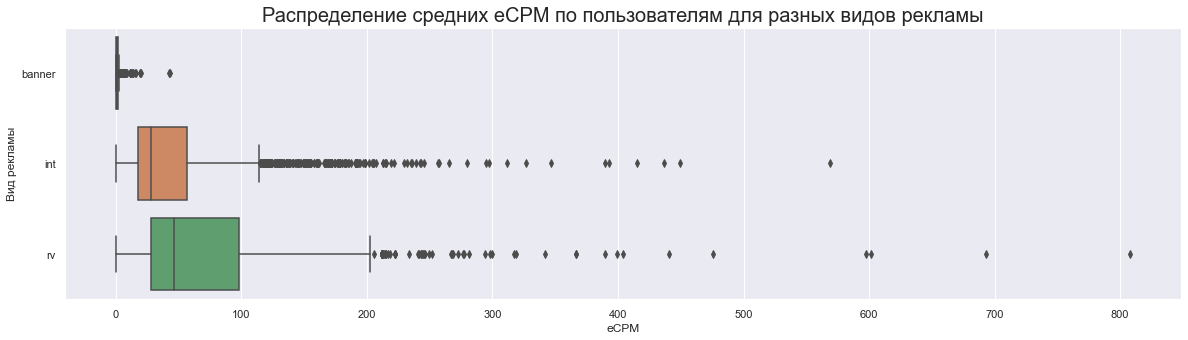

In [10]:
sns.set(rc={'figure.figsize': (20,5)})
sns.boxplot(data=eCPM_by_user, x='eCPM', y='ad_type')
plt.title('Распределение средних eCPM по пользователям для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 

Text(0.5, 1.0, 'Распределение средних eCPM по пользователям для баннерной рекламы')

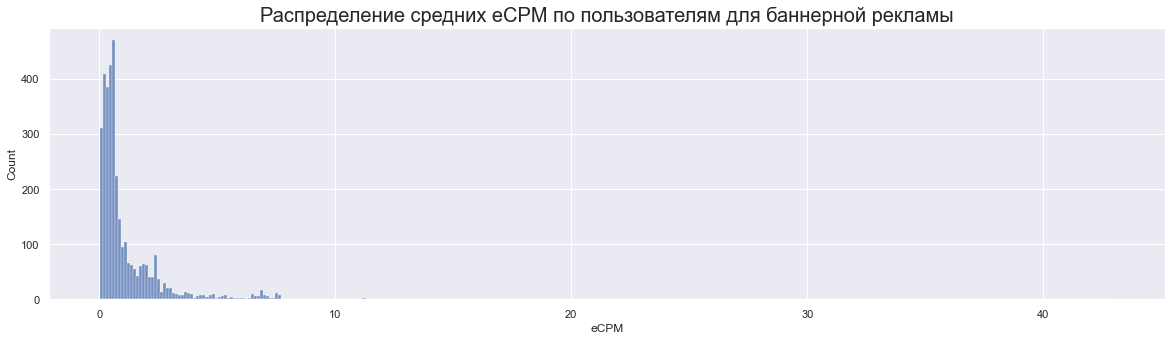

In [11]:
sns.set(rc={'figure.figsize': (20,5)})
sns.histplot(data=eCPM_by_user[eCPM_by_user.ad_type=='banner'], x='eCPM')
plt.title('Распределение средних eCPM по пользователям для баннерной рекламы', fontsize=20) 

Text(0.5, 1.0, 'Распределение средних eCPM по пользователям для полноэкранной рекламы')

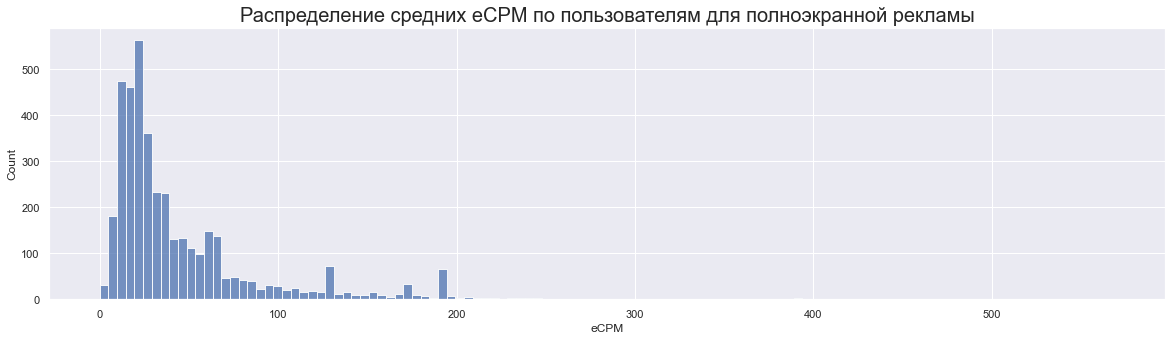

In [12]:
sns.set(rc={'figure.figsize': (20,5)})
sns.histplot(data=eCPM_by_user[eCPM_by_user.ad_type=='int'], x='eCPM')
plt.title('Распределение средних eCPM по пользователям для полноэкранной рекламы', fontsize=20) 

Text(0.5, 1.0, 'Распределение средних eCPM по пользователям для видео-рекламы')

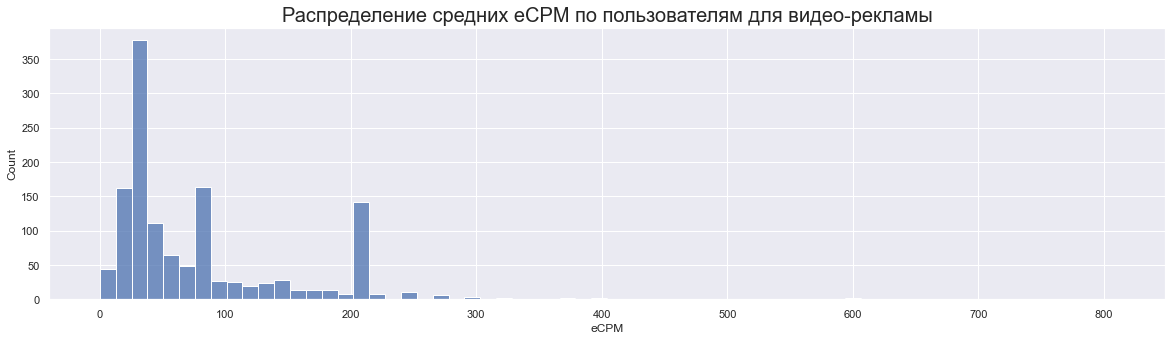

In [13]:
sns.set(rc={'figure.figsize': (20,5)})
sns.histplot(data=eCPM_by_user[eCPM_by_user.ad_type=='rv'], x='eCPM')
plt.title('Распределение средних eCPM по пользователям для видео-рекламы', fontsize=20) 

## 1b. Для кадого типа рекламы отобразим средние eCPM-ы по городам, версиям ОС

In [14]:
# посчитаем средние eCPM по городам для каждого типа рекламы
eCPM_by_city = (
    df
        .groupby(['city', 'ad_type'], as_index=False)
        .agg({'eCPM': 'mean'})
)
eCPM_by_city.head()


,city,ad_type,eCPM
0,Aberdeen,banner,0.321518
1,Aberdeen,int,13.583285
2,Aberdeen,rv,21.516378
3,Abilene,banner,0.941283
4,Abilene,int,50.301282


Text(0.5, 0, 'Среднее eCPM')

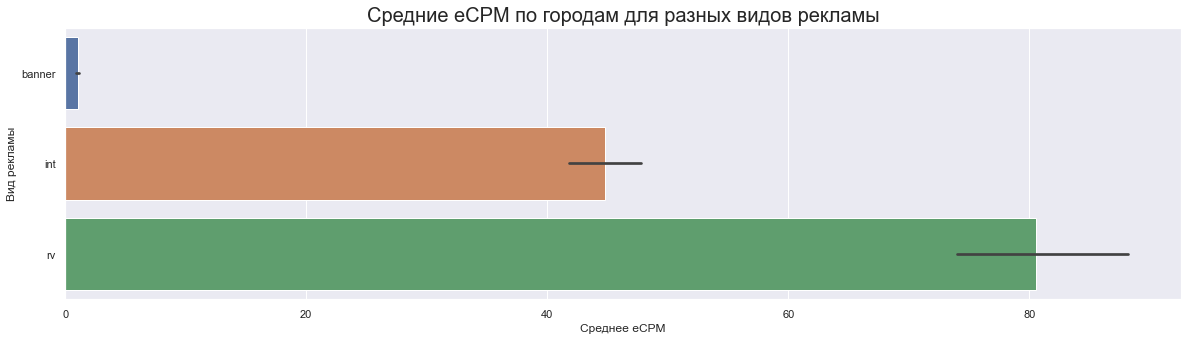

In [15]:
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=eCPM_by_city, x='eCPM', y='ad_type')
plt.title('Средние eCPM по городам для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 
plt.xlabel('Среднее eCPM') 

In [16]:
# значения средних eCPM по городам для разных видов рекламы
eCPM_by_city.groupby('ad_type').agg({'eCPM': 'mean'})

,eCPM
ad_type,
banner,1.026122
int,44.829423
rv,80.532356


In [17]:
# посчитаем средние eCPM по версиям ОС для каждого типа рекламы
eCPM_by_os_version = (
    df
        .groupby(['os_version', 'ad_type'], as_index=False)
        .agg({'eCPM': 'mean'})
)
eCPM_by_os_version.head()

,os_version,ad_type,eCPM
0,10,banner,0.591274
1,10,int,31.216643
2,10,rv,53.336882
3,11,banner,0.592766
4,11,int,33.468471


Text(0.5, 0, 'Среднее eCPM')

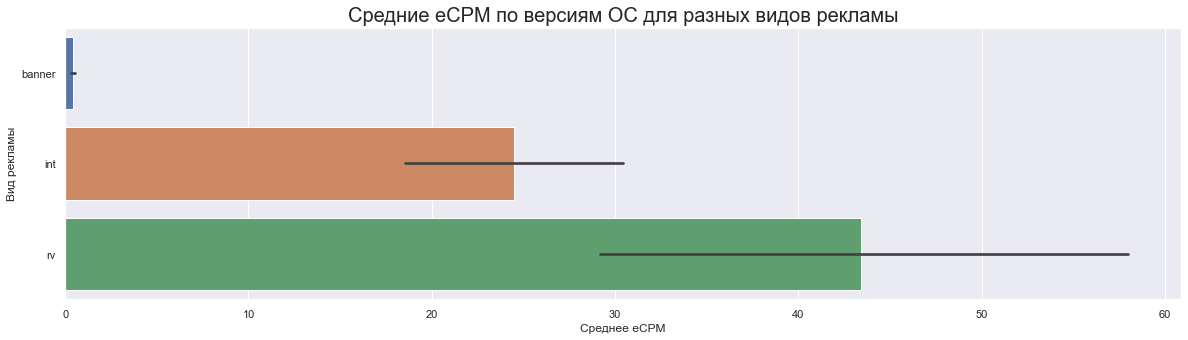

In [18]:
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=eCPM_by_os_version, x='eCPM', y='ad_type')
plt.title('Средние eCPM по версиям ОС для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 
plt.xlabel('Среднее eCPM') 

In [19]:
# значения средних eCPM по версиям ОС для разных видов рекламы
eCPM_by_os_version.groupby('ad_type').agg({'eCPM': 'mean'})

,eCPM
ad_type,
banner,0.406479
int,24.491810
rv,43.413864


## 1c. Для кадого типа рекламы отобразить суммарные доходы по городам, версиям ОС

In [20]:
# посчитаем суммарные доходы по городам для каждого типа рекламы
revenue_by_city = (
    df
        .groupby(['city', 'ad_type'], as_index=False)
        .agg({'revenue': 'sum'})
)
revenue_by_city.head()

,city,ad_type,revenue
0,Aberdeen,banner,0.030866
1,Aberdeen,int,0.081500
2,Aberdeen,rv,0.021516
3,Abilene,banner,0.043299
4,Abilene,int,0.402410


Text(0.5, 0, 'Суммарный доход')

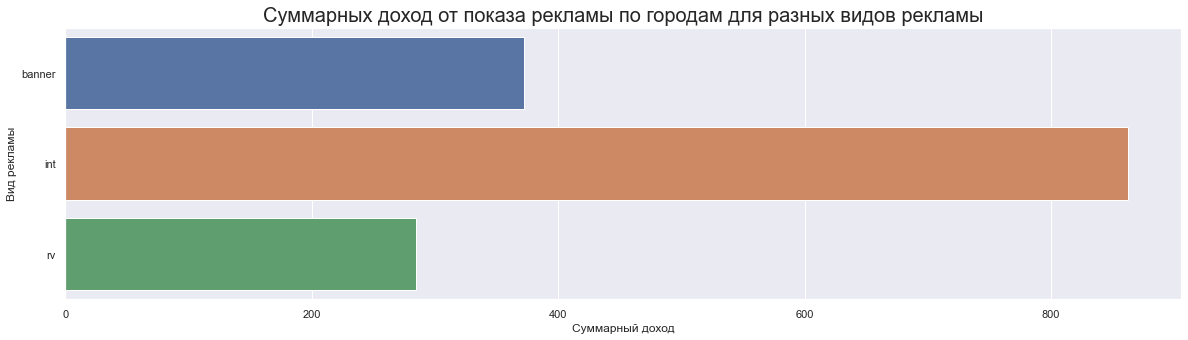

In [43]:
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=revenue_by_city
                    .groupby('ad_type', as_index=False)
                    .agg({'revenue': 'sum'})
                    , x='revenue'
                    , y='ad_type')
plt.title('Суммарных доход от показа рекламы по городам для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 
plt.xlabel('Суммарный доход') 

In [22]:
# значения суммарного дохода по городам для разных видов рекламы
revenue_by_city.groupby('ad_type').agg({'revenue': 'sum'})

,revenue
ad_type,
banner,372.500397
int,862.519932
rv,284.932268


Text(0.5, 0, 'Суммарный доход')

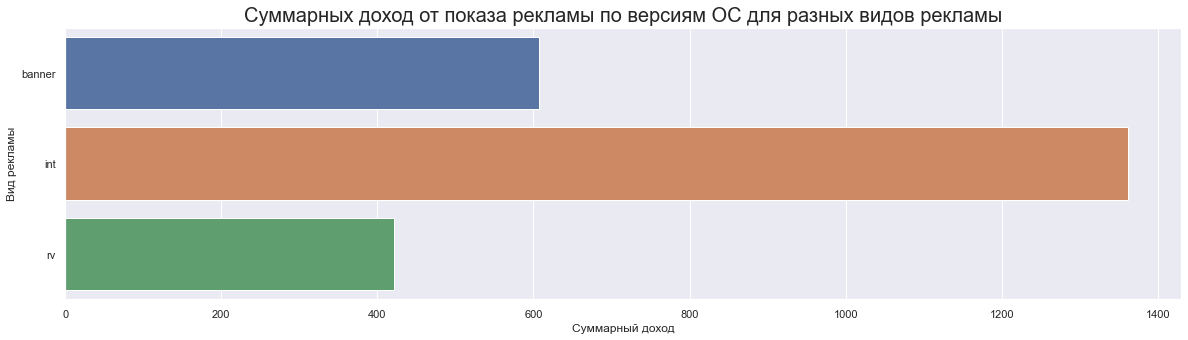

In [24]:
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=revenue_by_os_version
                    .groupby('ad_type', as_index=False)
                    .agg({'revenue': 'sum'})
                    , x='revenue'
                    , y='ad_type'
                    , estimator=sum)
plt.title('Суммарных доход от показа рекламы по версиям ОС для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 
plt.xlabel('Суммарный доход')

In [23]:
# посчитаем суммарные доходы по версиям ОС для каждого типа рекламы
revenue_by_os_version = (
    df
        .groupby(['os_version', 'ad_type'], as_index=False)
        .agg({'revenue': 'sum'})
)
revenue_by_os_version.head()

,os_version,ad_type,revenue
0,10,banner,85.002788
1,10,int,191.795052
2,10,rv,51.470091
3,11,banner,116.298348
4,11,int,363.634932


Text(0.5, 0, 'Суммарный доход')

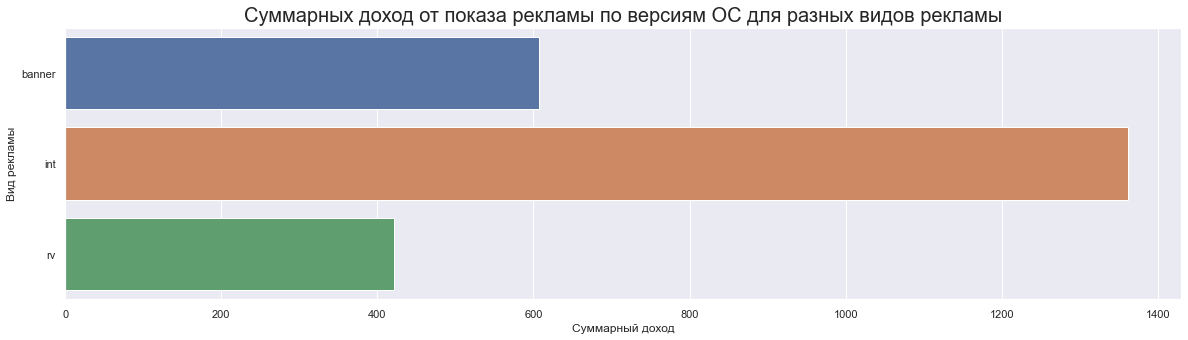

In [24]:
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=revenue_by_os_version
                    .groupby('ad_type', as_index=False)
                    .agg({'revenue': 'sum'})
                    , x='revenue'
                    , y='ad_type'
                    , estimator=sum)
plt.title('Суммарных доход от показа рекламы по версиям ОС для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 
plt.xlabel('Суммарный доход')

In [25]:
# значения суммарного дохода по версиям ОС для разных видов рекламы
revenue_by_os_version.groupby('ad_type').agg({'revenue': 'sum'})

,revenue
ad_type,
banner,607.184041
int,1361.952967
rv,421.661652


## 2. Учесть статистическую значимость для п.1b

Text(0, 0.5, 'Вид рекламы')

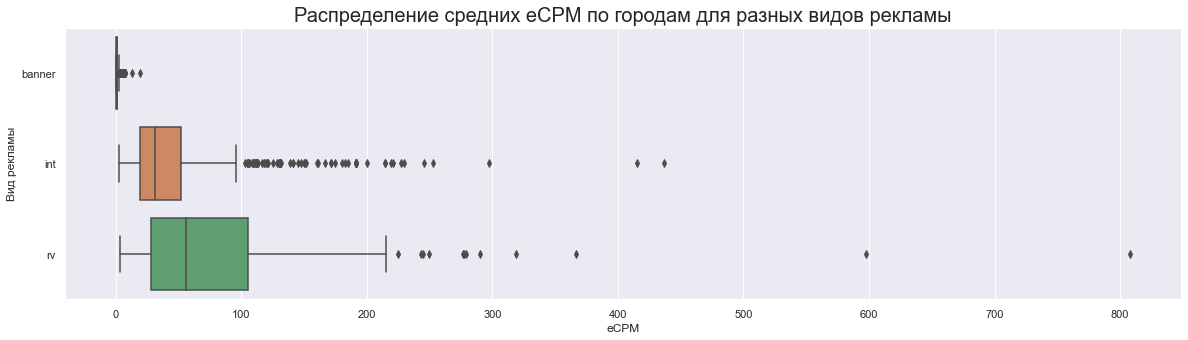

In [26]:
sns.set(rc={'figure.figsize': (20,5)})
sns.boxplot(data=eCPM_by_city, x='eCPM', y='ad_type')
plt.title('Распределение средних eCPM по городам для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 

Text(0, 0.5, 'Вид рекламы')

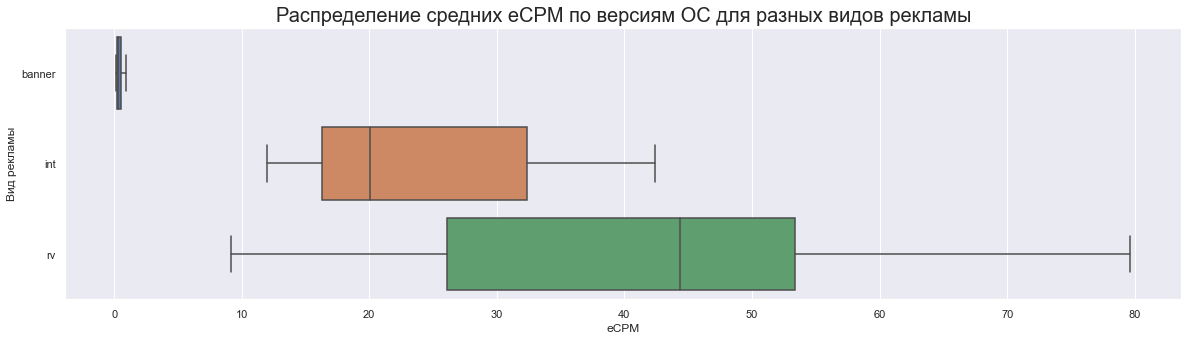

In [27]:
sns.set(rc={'figure.figsize': (20,5)})
sns.boxplot(data=eCPM_by_os_version, x='eCPM', y='ad_type')
plt.title('Распределение средних eCPM по версиям ОС для разных видов рекламы', fontsize=20) 
plt.ylabel('Вид рекламы') 

Для корректного сравнения средних необходимо избавиться от выбрасов в eCPM_by_city (средних eCPM по городам для разных видов рекламы).

In [28]:
# находим границы выбрасов для баннерной рекламы через межквартильный размах
q1 = eCPM_by_city.query('ad_type == "banner"').eCPM.quantile(0.25) 
q3 = eCPM_by_city.query('ad_type == "banner"').eCPM.quantile(0.75) 
iqr = q3 - q1
outlier_bottom_banner = q1 - 1.5 * iqr  # нижняя граница 
outlier_up_banner = q3 + 1.5 * iqr      # верхняя граница 
print(outlier_bottom_banner)             
print(outlier_up_banner)

-0.7764137131308406
2.2067509824429115


In [29]:
# находим границы выбрасов для полноэкранной рекламы через межквартильный размах
q1 = eCPM_by_city.query('ad_type == "int"').eCPM.quantile(0.25) 
q3 = eCPM_by_city.query('ad_type == "int"').eCPM.quantile(0.75) 
iqr = q3 - q1
outlier_bottom_int = q1 - 1.5 * iqr  # нижняя граница 
outlier_up_int = q3 + 1.5 * iqr      # верхняя граница 
print(outlier_bottom_int)             
print(outlier_up_int)

-29.68499395501328
101.2387473251564


In [30]:
# находим границы выбрасов для видео-рекламы через межквартильный размах
q1 = eCPM_by_city.query('ad_type == "rv"').eCPM.quantile(0.25) 
q3 = eCPM_by_city.query('ad_type == "rv"').eCPM.quantile(0.75) 
iqr = q3 - q1
outlier_bottom_rv = q1 - 1.5 * iqr  # нижняя граница 
outlier_up_rv = q3 + 1.5 * iqr      # верхняя граница 
print(outlier_bottom_rv)             
print(outlier_up_rv)

-86.81130611284053
219.9921768547342


Отрицательное нижнее значение выходит за границы наших данных, можно не фильтровать по этой границе.

In [31]:
# отфильтруем выбросы
eCPM_by_city = (
    eCPM_by_city
        .query('(ad_type == "banner" and eCPM <= @outlier_up_banner) or (ad_type == "int" and eCPM <= @outlier_up_int) or (ad_type == "rv" and eCPM <= @outlier_up_rv)')
)

При множественном сравнении возрастает вероятности ошибки I рода. Чтобы избежать этого  необходимо применять поправку на множественное сравнение.  
Применим Критерий Тьюки для множественного сравнения средних.   
H0 - нет различий между сравниваимыми группами, H1 - различия имеются и они стат значимы.

In [32]:
# критерий Тьюки для средних eCPM по городам для разных видов рекламы
print(pairwise_tukeyhsd(eCPM_by_city.eCPM, eCPM_by_city.ad_type)) 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
banner    int  33.2081 0.001 29.6532 36.7629   True
banner     rv  72.6275 0.001 68.4367 76.8182   True
   int     rv  39.4194 0.001 35.2608  43.578   True
---------------------------------------------------


In [33]:
# критерий Тьюки для средних eCPM по версиям ОС для разных видов рекламы
print(pairwise_tukeyhsd(eCPM_by_os_version.eCPM, eCPM_by_os_version.ad_type)) 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
banner    int  24.0853 0.0022  8.2409 39.9297   True
banner     rv  43.0074  0.001 26.7717 59.2431   True
   int     rv  18.9221 0.0197  2.6864 35.1577   True
----------------------------------------------------


Как видно по последним колонкам, все нулевые гипотезы были отклонены, поэтому мы делаем вывод, что средние всех трёх групп и по городам и по версиям ОС значимо различаются.

## 3. Опишем наблюдения и сделаем вывод по исследованию.

Распределение средних eCPM по городам для разных видов рекламы имеют выбросы в то же время распределение средних по версиям ОС выбрасов не имеют. Это может быть связано с тем, что более высокие значения средних по городам встречаются значительно чаще на определённых версиях ОС.   
Почти 38% данных не содержат информации о городе, это может внести некоторые искажения в расчёт. 
Самым выгодным видом рекламы является полноэкранная, за ней идёт баннерная (не смотря на самые низкие показатели eCPM для всех сравниваемых групп), на последнем месте видео-реклама (не смотря на самые высокие показатели eCPM). 
Различия средних eCPM по городам и версиям ОС являются статистически значимыми.  

## 4. Дополнительные

### Какой процент доходов содержит информацию о городе юзера

In [34]:
# процент доходов, содержащий информацию о городе
'{:.2%}'.format(
    df[df.city.notna()]
        .revenue.sum() / df.revenue.sum()
    )

'63.58%'

### Зависит ли eCPM от времени дня

Сгруппируем eCPM по часам и сравним значения.

In [35]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,eCPM,ad_type,revenue
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0.510313,banner,0.000510
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,0.510313,banner,0.000510
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,2.386163,banner,0.002386
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,13.893784,int,0.013894
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,6.827570,banner,0.006828


In [36]:
# добавим колонку часов
df['Hour'] = df.event_datetime.dt.hour

In [37]:
# сгруппируем по часам
eCPM_by_hours = df. groupby('Hour').agg({'eCPM': 'mean'})

(0.0, 3.5)

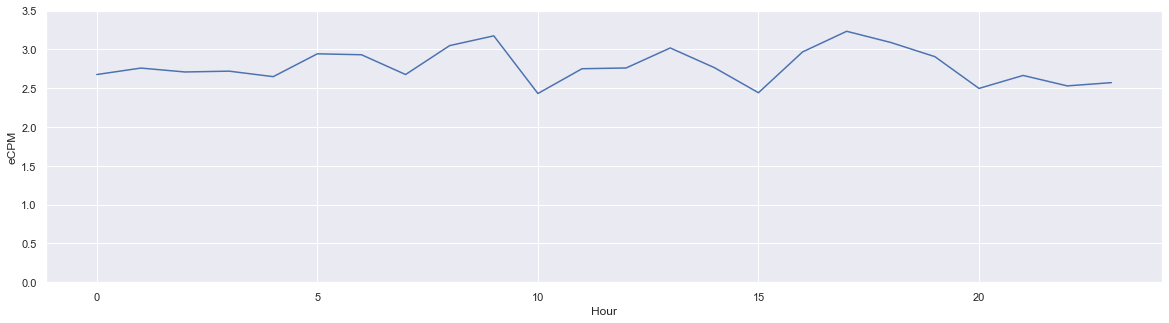

In [38]:
fig, ax = plt.subplots()
sns.lineplot(x=eCPM_by_hours.index, y="eCPM", data=eCPM_by_hours)
ax.set_ylim(0, 3.5)

In [39]:
eCPM_by_hours.min()

eCPM    2.431129
dtype: float64

In [40]:
eCPM_by_hours.max()

eCPM    3.232273
dtype: float64

Судя по графику eCPM меняется по часам в течение дня в среднем от 2.4 до 3.2 доллара за 1000 показов.